# Scikit-Learn cheat sheet

### 1. loading data

In [1]:
import pandas as pd
from sklearn import datasets

X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [2]:
df = pd.concat([X, y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.value_counts()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension  target
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.00000              0.1930         0.07818                 0.2241        1.5080         1.553            9.833       0.010190          0.010840           0.00000          0.000000              0.02659         0.004100                 7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.00000               0.29

In [5]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [34]:
# Check for imbalanced data
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

### 2. train/test split

In [38]:
from sklearn.model_selection import train_test_split

# stratify the split to maintain the proportion of classes in the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data:  {X_test.shape, y_test.shape}")

Train data: ((455, 30), (455,))
Test data:  ((114, 30), (114,))


### 3. preprocessing data

In [13]:
# Rename columns to lower case
cols = list(X.columns)
lower_cols = [col.replace(" ", "_").lower() for col in cols]
X.columns = lower_cols

In [30]:
# visualize data disstribution
import matplotlib.pyplot as plt


# plot different features
def plot_distributions(df: pd.DataFrame, feature1: str, feature2: str) -> None:
    fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
    ax.scatter(df[feature1], df[feature2], s=10, alpha=0.7)
    ax.set_title("Different scales between two features")
    ax.set_xlabel(f"{feature1.replace('_', ' ').title()}")
    ax.set_ylabel(f"{feature2.replace('_', ' ').title()}")
    ax.grid(color="blue", linestyle="--", linewidth=1, alpha=0.2)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    fig.tight_layout(pad=3)

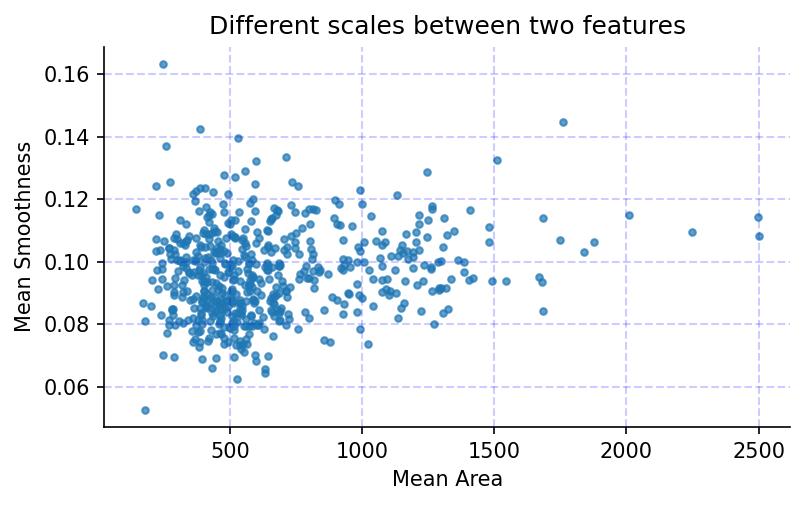

In [ ]:
# plot regular data
plot_distributions(df=X, feature1="mean_area", feature2="mean_smoothness")

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

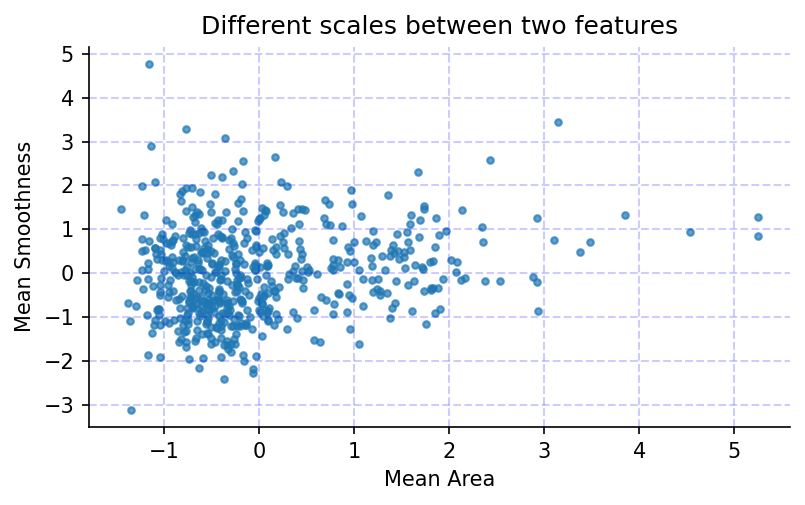

In [31]:
# plot scaled data
plot_distributions(df=X_scaled, feature1="mean_area", feature2="mean_smoothness")

In [28]:
from sklearn.preprocessing import Normalizer

# Normalization
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

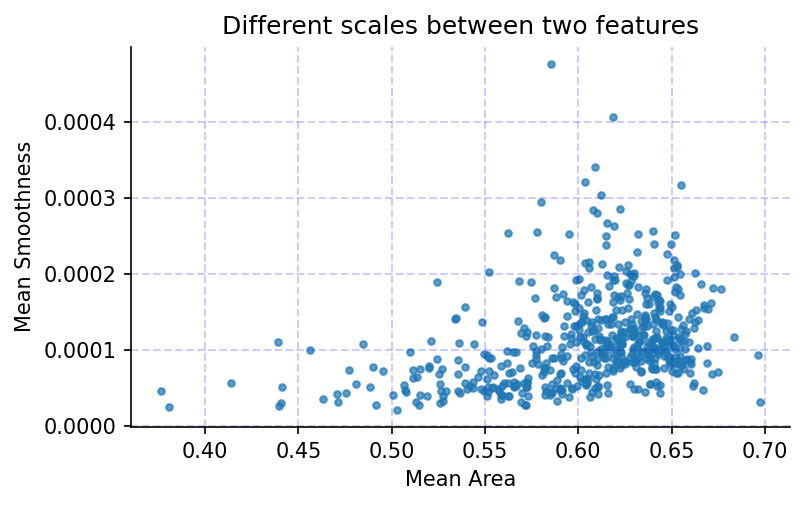

In [33]:
# plot normalized data
plot_distributions(df=X_normalized, feature1="mean_area", feature2="mean_smoothness")

### 4. CountVectorizer for text data

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a count matrix
X_text = vectorizer.fit_transform(documents)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print the vocabulary and the resulting sparse matrix
print("Vocabulary:", feature_names)
print("Count Matrix:\n", X_text.toarray())

Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Count Matrix:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [37]:
df_text = pd.DataFrame(X_text.toarray(), columns=feature_names)
df_text.head()

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


### 5. create a model

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# KNN pipeline
knn_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5)),
    ]
)

# Decision Tree pipeline
dt_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", DecisionTreeClassifier(random_state=42)),
    ]
)

# Logistic Regression pipeline
lr_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000, random_state=42)),
    ]
)


# Function to run pipelines
def fit_predict(pipe: object, X: pd.DataFrame, y: pd.DataFrame) -> None:
    # Fit model
    pipe.fit(X, y)
    # Make predictions
    y_pred = pipe.predict(X)
    # Scores
    score = pipe.score(X, y)
    f1 = f1_score(y_pred, y)

    print(f"{str(pipe['model'].__class__.__name__)}")
    print(f"Accuracy: {round(score, 3)}")
    print(f"F1 Score: {round(f1, 3)}\n")


# Fit and predict using the pipelines
fit_predict(knn_pipe, X_train, y_train)
fit_predict(dt_pipe, X_train, y_train)
fit_predict(lr_pipe, X_train, y_train)

KNeighborsClassifier
Accuracy: 0.974
F1 Score: 0.979

DecisionTreeClassifier
Accuracy: 1.0
F1 Score: 1.0

LogisticRegression
Accuracy: 0.989
F1 Score: 0.991



### 6. grid search

In [42]:
dt_pipe["model"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Decision Tree pipeline
dt_pipe = Pipeline(
    steps=[
        ("scale", StandardScaler()),
        ("model", DecisionTreeClassifier()),
    ]
)

# DecisionTree GridSearchCV params
dt_param_grid = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": list(range(1, 11, 1)),
    "model__min_samples_leaf": list(range(1, 11, 1)),
}

# Stratified sampling
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Init GridSearchCV
gridsearch = GridSearchCV(
    estimator=dt_pipe,
    param_grid=dt_param_grid,
    scoring="f1",
    cv=strat_kfold,
    verbose=2,
    n_jobs=-1,
)

In [48]:
# fit model
dt_clf = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s

[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=1, mo

In [49]:
# gridsearch object
dt_clf

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__criterion': ['gini', 'entropy'], 'model__max_depth': [1, 2, ...], 'model__min_samples_leaf': [1, 2, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [50]:
dt_clf.best_estimator_

,steps,"[('scale', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2


In [51]:
dt_clf.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 5,
 'model__min_samples_leaf': 5}

In [54]:
# make predictions
train_score = dt_clf.score(X_train, y_train)
test_score = dt_clf.score(X_test, y_test)

print(f"Train accuracy: {round(train_score, 3)}")
print(f"Test accuracy:  {round(test_score, 3)}")

Train accuracy: 0.986
Test accuracy:  0.93


In [ ]:
# F1 score
y_pred = dt_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {round(f1, 3)}")

F1 score: 0.93


### 7. boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", GradientBoostingClassifier(random_state=42)),
    ]
)

# fit model
gbc_pipe.fit(X_train, y_train)
# Train and test scores
train_scores = gbc_pipe.score(X_train, y_train)
test_scores = gbc_pipe.score(X_test, y_test)
# make predictions
y_pred = gbc_pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"Train accuracy: {round(train_scores, 3)}")
print(f"Test accuracy:  {round(test_scores, 3)}")
print(f"F1 score: {round(f1, 3)}")

Train accuracy: 1.0
Test accuracy:  0.956
F1 score: 0.966


In [69]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_distributions = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__min_samples_split": [2, 5, 10],
}

boost_search = RandomizedSearchCV(
    gbc_pipe,
    param_distributions,
    n_iter=10,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring="f1",
)
boost_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__max_depth': [3, 5, ...], 'model__min_samples_split': [2, 5, ...], 'model__n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [70]:
y_pred = boost_search.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("GradientBoostingClassifier")
print(f"F1 score: {round(f1, 3)}")

GradientBoostingClassifier
F1 score: 0.966


In [71]:
y_pred = lr_pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("LogisticRegression")
print(f"F1 score: {round(f1, 3)}")

LogisticRegression
F1 score: 0.986


In [72]:
y_pred = dt_pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("DecisionTreeClassifier")
print(f"F1 score: {round(f1, 3)}")

DecisionTreeClassifier
F1 score: 0.929


In [74]:
from sklearn.metrics import classification_report

print("Classification Report for GradientBoostingClassifier")
y_pred = boost_search.predict(X_test)
print(classification_report(y_test, y_pred))

Classification Report for GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

